In [6]:
import pandas as pd
import os
import pickle
import matplotlib.pyplot as plt

In this notebook, we make forecasts of churn and retention probability on the current customer set. The main steps involved are:

1) Load the pickle of the logistic regression object.
2) Load the dataset of grouped scores for the current customers
3) Call the `predict_proba` function on the logistic regression object, passing in
the customer dataset. This gives us a two-column ndarray
of predictions for churn and retention probability.
4) Save the forecasts for later reference.

We also inspect the churn probabilities by plotting a histogram.

In [7]:
# Load customer data files into a DataFrame using the appropriate number of columns
def reload_churn_data(data_set_path, suffix, is_customer_data): 
   data_path = data_set_path.replace('.csv', '_{}.csv'.format(suffix))
   ic = [0,1] if is_customer_data else 0 
   churn_data = pd.read_csv(data_path, index_col=ic)
   return churn_data

In [8]:
data_set_path = '../../output/socialnet7_dataset2.csv'

pickle_path = data_set_path.replace('.csv', '_logreg_model.pkl')
# 'rb' mode - opening a binary file
with open(pickle_path, 'rb') as fid:
    logreg_model = pickle.load(fid)

# Reload current customer group scores
current_score_df = reload_churn_data(data_set_path, 'current_groupscore', is_customer_data=True)

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [9]:
# Use the model to make the predictions
# predict_proba is the method of sklearn.linear_model.LogisticRegression which returns the 
# predicted probability of each class
predictions = logreg_model.predict_proba(current_score_df.to_numpy())

# Save the predictions in a new DataFrame
predict_df = pd.DataFrame(predictions, 
                            index=current_score_df.index,
                            columns=['churn_prob', 'retain_prob'])

The forecast outputs are similar to those for the historical customer dataset, except that they consist of only one observation date and a single observation for each customer:

In [21]:
predict_df.head()

,,churn_prob,retain_prob
account_id,observation_date,,
3,2020-05-10,0.021592,0.978408
4,2020-05-10,0.009902,0.990098
5,2020-05-10,0.031789,0.968211
6,2020-05-10,0.023117,0.976883
7,2020-05-10,0.005576,0.994424


In [23]:
predict_df[['churn_prob', 'retain_prob']].mean()

churn_prob     0.044886
retain_prob    0.955114
dtype: float64

We see that the mean predicted churn and retention probabilities are very close to those of the historical predictions we saw in the `forecast-churn/results-of-logistic-regression.ipynb` notebook, and close to the summary stats of the sample dataset.

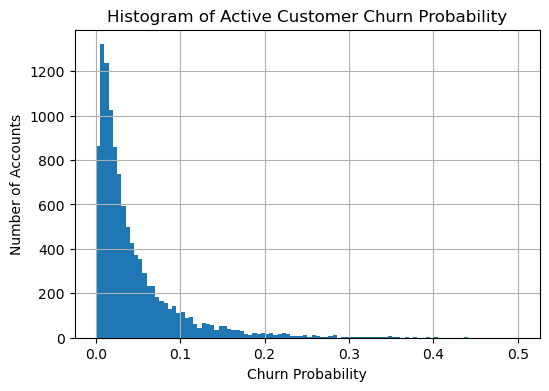

In [19]:
plt.figure(figsize = [6, 4])
n, bins, _ = plt.hist(predict_df['churn_prob'].values, bins=100)
plt.xlabel('Churn Probability')
plt.ylabel('Number of Accounts')
plt.title('Histogram of Active Customer Churn Probability')
plt.grid()
plt.show()

There is a tail of accounts with significantly higher churn probability, but no accounts hve anywhere near 100% churn probability. The vast majority have less than 20% churn probability.

In [24]:
forecast_save_path = data_set_path.replace('.csv', '_current_predictions.csv')
predict_df.to_csv(forecast_save_path, header=True)